## Simple example to load, analyze, and plot a raw .abf file

## Import

In [1]:
# Auto reload imports, this allows us to edit the source and have it rre-imported
%load_ext autoreload
%autoreload 2

import sys

# needed to import from sanpy/ which is one folder up
sys.path.append("..") # Adds higher directory to python modules path.

import matplotlib.pyplot as plt # so we can plot in this notebook using matplotlib

from sanpy import bAnalysis
from sanpy import bAnalysisPlot

### Load an abf file

In [2]:
file = '../data/19114001.abf'
ba = bAnalysis.bAnalysis(file)

# ba is an object of type bAnalysis, see bAnalysis.py for its data members and member functions 

# print some info about the abf file we just loaded
print(ba)

# get the sweep list, because SanPy is designed forr spontaneous activity, we only handle one sweep !!!
print('ba.sweepList:', ba.sweepList)

# set the sweep (there will be no output)
#ba.setSweep(0)

# set a sweep that does not exist
#ba.setSweep(10)

# get dataPointsPerMs, this is the same as sampling frrequency
print('ba.dataPointsPerMs:', ba.dataPointsPerMs)

file: ../data/19114001.abf
ABF (version 2.0.0.0) with 1 channel (mV), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 1.00 minutes, recorded with protocol "Gapfree AP".
ba.sweepList: [0]
ba.dataPointsPerMs: 20


## Plot the derivative of Vm (dV/dt) to select threshold for spike detection.

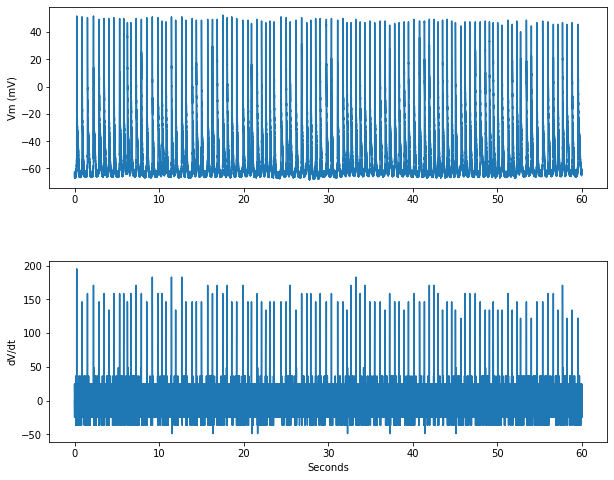

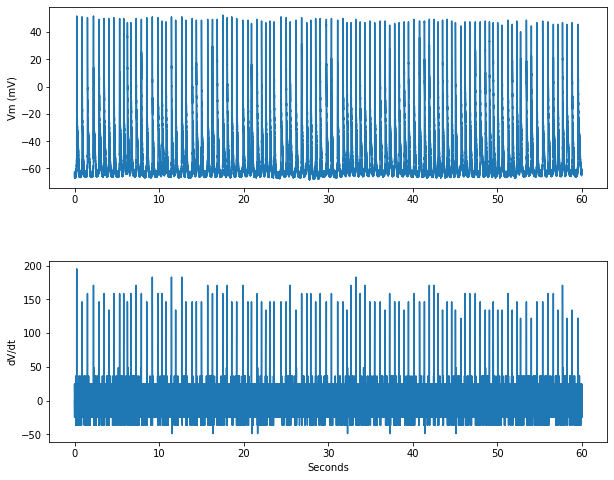

In [3]:
myMedianFiler = 5
ba.getDerivative(medianFilter=myMedianFiler)

bAnalysisPlot.bPlot.plotDeriv(ba)

## Run spike detection with a theshold and plot results

Here, we specify a dV/dt theshold (myThreshold = 100) and call the main detection function `ba.spiikeDetect()`.

We then plot the results with `bAnalysisPlot.bPlot.plotSpikes`.

bAnalysis.spikeDetect0()
	dVthresholdPos: 100
	minSpikeVm: -20
	medianFilter: 0
bAnalysis.spikeDetect() for file ../data/19114001.abf detected 103 spikes in 0.05 seconds


(None, <AxesSubplot:xlabel='Time (sec)', ylabel='Vm (mV)'>)

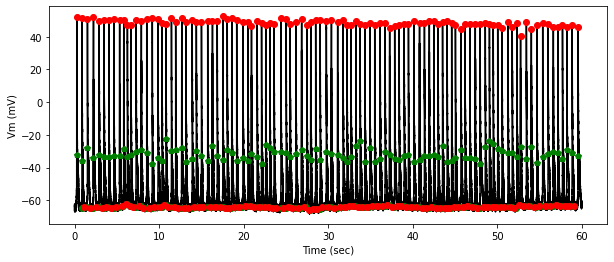

In [4]:
# load a file (done above)
#file = 'data/19114001.abf'
#ba = bAnalysis.bAnalysis(file)

#
# run spike detectection
myThreshold = 100
myMinSpikeVm = -20
halfHeights = [20, 50, 80]
ba.getDerivative()
ba.spikeDetect(dVthresholdPos=myThreshold, minSpikeVm=myMinSpikeVm, halfHeights=halfHeights)

#
# plot Vm with all detected spikes (threshold, peak, pre/post min, half-wdiths
fig = plt.figure(figsize=(10, 4))
myAxis = fig.add_subplot(1, 1 , 1)

bAnalysisPlot.bPlot.plotSpikes(ba, ax=myAxis)

